In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)

import glob
from datetime import datetime


import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

# from crawlab_toolbox.freq_tools import welch_stat
from scipy.signal import welch
from scipy.stats import describe

from DBInserter import DBInserter


plt.rcParams['figure.figsize'] = (15, 4)


In [2]:
assetId = ['IMS2_Bearing1','IMS2_Bearing2','IMS2_Bearing3','IMS2_Bearing4']
sensorId = ['sensor1','sensor1','sensor1','sensor1']

Set No. 2:
Recording Duration: February 12, 2004 10:32:39 to February 19, 2004 06:22:39

No. of Files:984

No. of Channels: 4

Channel Arrangement: 

Bearing 1 –Ch 1; 
Bearing2 –Ch 2; 
Bearing3 –Ch3; 
Bearing 4 –Ch 4.

File Recording Interval: Every 10 minutes
File Format: ASCII
Description: At  the  end  of  the  test-to-failure  experiment,  outer  race  failure  occurred  in bearing 1.

AssetId = Bearing1-Set1
SensorId = Channel1

In [3]:
# load, average and merge sensor samples
data_dir = '../../../../Data/Bearings/IMS/2nd_test/'


In [4]:
fileNames = os.listdir(data_dir)
files = [f for f in glob.glob(data_dir + '/2004*', recursive=True)]


samplingRate = int(20e3)
fftPoints = 8192


FileNotFoundError: [Errno 2] No such file or directory: '../../../../Data/Bearings/IMS/2nd_test/'

In [49]:
def parse_file(filename,inserter):

    dataset = pd.read_csv(filename, sep='\t')
    
    data = dataset.values
    
    datetime_object = datetime.strptime(filename.split('/')[-1], '%Y.%m.%d.%H.%M.%S')
    datetime_string = datetime_object.strftime('%Y-%m-%d %H:%M:%S.%f')
 
    freqs,amps = welch(dataset.values.T,fs=samplingRate,nperseg=fftPoints,average='mean')
    
    this_rms = np.sqrt(1 / np.array(data).shape[0] * np.sum(np.array(data)**2,axis=0))
    
    _,minmax,mean,variance,skewness,kurtosis = describe(data)

    NyquistFrequency = 0.5 * samplingRate

    frequencyInterval = freqs[1] - freqs[0]

    sampleRMS = np.sqrt(1 / data.shape[0] * np.sum(data**2,axis=0))
    
    for i in range(len(assetId)):
        inserter.insert_value('RMS',
                              datetime_string,
                              assetId[i],
                              sensorId[i],
                              np.round(sampleRMS[i],5))
        inserter.insert_value('VibrationMean',
                              datetime_string,
                              assetId[i],
                              sensorId[i],
                              np.round(mean[i],5))
        inserter.insert_value('VibrationKurtosis',
                              datetime_string,
                              assetId[i],
                              sensorId[i],
                              np.round(kurtosis[i],5))
        inserter.insert_value('VibrationSkewness',
                              datetime_string,
                              assetId[i],
                              sensorId[i],
                              np.round(skewness[i],5))
        inserter.insert_value('VibrationVariance',
                              datetime_string,
                              assetId[i],
                              sensorId[i],
                              np.round(variance[i],5))

        inserter.insert_fft(datetime_string,
                              assetId[i],
                              sensorId[i],
                              np.array2string(amps[i,:].flatten(),precision=5,separator=','),
                              frequencyInterval)
#         inserter.insert_fft_std(datetime_string,
#                                 assetId[i],
#                                 sensorId[i],
#                                 np.array2string(stdevs[i,:].flatten(),precision=5,separator=','),
#                                 frequencyInterval)
        
    
    return freqs, amps



In [50]:
inserter = DBInserter('dbt1')
for j in range(len(files)):
    parse_file(files[j],inserter)

In [45]:
dataset = pd.read_csv(files[0], sep='\t')
data = dataset.values
freqs,amps = welch(dataset.values.T,fs=samplingRate,nperseg=fftPoints,average='mean')
# amps.shape[2]

In [46]:
amps.shape

(4, 4097)

(4, 4097)


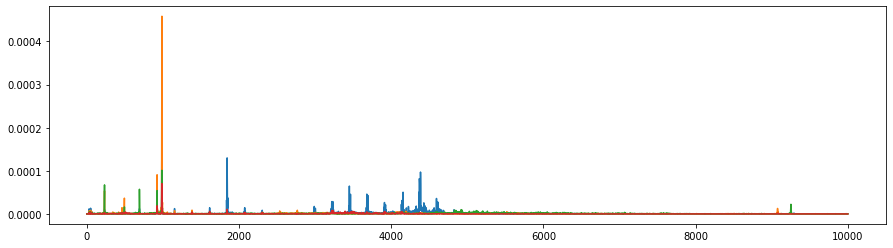

In [38]:
print(amps.shape)
# print(stdevs.shape)
# plt.plot(stdevs.T)
# plt.show()

plt.plot(freqs,amps.T)
plt.show()

In [ ]:

this_rms = np.sqrt(1 / np.array(dataset).shape[0] * np.sum(np.array(dataset)**2,axis=0))

_,minmax,mean,variance,skewness,kurtosis = describe(data)

NyquistFrequency = 0.5 / samplingInterval

freqs,amps = signal.welch(data, fs=1 / samplingInterval, nperseg=fftPoints)

frequencyInterval = freqs[1] - freqs[0]

sampleRMS = np.sqrt(1 / data.shape[0] * np.sum(data**2))